# Python functions, objects and classes

## Task 1
Please use the function defined below to print out the text "Hello my friend"!

In [4]:
def hello(who="people"):
    print("Hello",who)



In [ ]:
hello("my friend")

## Task 2

In [1]:
class AbstractShape:
    """A class representing planar figures.
    """
    
    def __init__(self, centerx, centery, color="black"):
        """Initialize a shape.
        
        Args:
            centerx: The x coordinate of the shape's center.
            centery: The y coordinate of the shape's center.
            color (str): The shape's color.
        """
        self.centerx = centerx
        self.centery = centery
        self.color = color
        
    def move_by(self, dx, dy):
        """Move the shape by the given distances.
        
        Args:
            dx: Movement along the x axis.
            dy: Movement along the y axis.
            
        Returns:
            None
        """
        self.centerx += dx
        self.centery += dy
        
    def area(self):
        """Return the area of the shape
        """
        raise NotImplementedError # Raise an exception if a class simply inherits without implementing

In [2]:
from math import pi # We will need pi for calculating the area

class Circle(AbstractShape):
    """A class representing a circle.    
    """
    
    def __init__(self, centerx, centery, radius, color="black"):
        """Initialize the circle.
        
        Args:
            centerx: The x coordinate of the circle's center.
            centery: The y coordinate of the circle's center.
            radius: The radius of the circle.
            color (str): The circle's color.
        """
        self.centerx = centerx
        self.centery = centery
        self.radius = radius
        self.color = color
        
    def area(self):
        return pi * self.radius ** 2
    
    @property
    def diameter(self):
        """Return the circle's diameter.
        """
        return 2 * self.radius
    
    @diameter.setter
    def diameter(self, diameter):
        """Set the diameter to the givem size.
        """
        self.radius = diameter / 2
    
    def __repr__(self):
        """Return the string representation of the circle.
        """
        return f"Circle({self.centerx}, {self.centery}, {self.radius}, '{self.color}')"

In [3]:
from math import sqrt

class Rectangle(AbstractShape):
    """A class representing a rectangle.
    
    The sides are assumed to be parallel with the X and Y axis.
    """
    
    def __init__(self, centerx, centery, width, height, color="black"):
        """Initialize the rectangle.
        
        Args:
            centerx: The x coordinate of the rectangle's center.
            centery: The y coordinate of the rectangle's center.
            width: The size of the rectangle's horizontal side.
            height: The size of the rectangle's verticak side.
            color (str): The rectangle's color.
        """
        self.centerx = centerx
        self.centery = centery
        self.width = width
        self.height = height
        self.color = color
        
    def area(self):
        return self.width * self.height
    
    @property
    def diagonal(self):
        """Return the size of the rectangle's diagonal.
        """
        return sqrt(self.width ** 2 + self.height ** 2)
    
    def __repr__(self):
        """Return the string representation of the rectangle.
        """
        return f"Rectangle({self.centerx}, {self.centery}, {self.width}, {self.height}, '{self.color}')"

In [4]:
r = Rectangle(0, 0, 4, 3)
r

Rectangle(0, 0, 4, 3, 'black')

In [5]:
r.diagonal

5.0

In [6]:
r.area()

12

In [7]:
r.move_by(1,1)
r

Rectangle(1, 1, 4, 3, 'black')

In [8]:
c = Circle(0,0,3, "red")
print(c)
c.area()

Circle(0, 0, 3, 'red')


28.274333882308138

In [9]:
c.diameter = 20
c

Circle(0, 0, 10.0, 'red')

# Pandas basics

## Reading the data

The dataset we will be using contains data about [Abalone shells](https://en.wikipedia.org/wiki/Abalone). (With some noise graciously added by us :-P

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Haliotis_clathrata_01.JPG/367px-Haliotis_clathrata_01.JPG">


In [ ]:
!wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/abalone.csv


The data is in the file "abalone.csv".

**General info**

>Predicting the age of abalone from physical measurements.  The age of
   abalone is determined by cutting the shell through the cone, staining it,
   and counting the number of rings through a microscope -- a boring and
   time-consuming task.  Other measurements, which are easier to obtain, are
   used to predict the age.  Further information, such as weather patterns
   and location (hence food availability) may be required to solve the problem.
   From the original data examples with missing values were removed (the
   majority having the predicted value missing), and the ranges of the
   continuous values have been scaled for use with an ANN (by dividing by 200).


**Field info**

>Sex / nominal / -- / M, F, and I (infant)

> Length / continuous / mm / Longest shell measurement

> Diameter / continuous / mm / perpendicular to length

> Height / continuous / mm / with meat in shell
> Whole weight / continuous / grams / whole abalone

> Shucked weight / continuous / grams / weight of meat

> Viscera weight / continuous / grams / gut weight

> Shell weight / continuous / grams / after being dried

> Rings / integer / -- / +1.5 gives the age in years 

In [10]:
import pandas as pd

df = pd.read_csv("abalone.csv", sep=";", decimal=",")

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,NaN,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [11]:
df.shape

(4177, 9)

## Fixing the column names

Fix the column names to be able to use "dot syntax" for columns.

In [12]:
def normalize_columnname(h):
    """Normalize a column name by downcasing and replacing spaces with '_'.
    """
    h = h.split()
    h = "_".join(h)
    return h.lower()

df.rename(columns=normalize_columnname, inplace=True)
df.rename(columns=str.lower, inplace=True)
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,NaN,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [13]:
df.whole_weight.head()

0    0.5140
1    0.2255
2    0.6770
3    0.5160
4    0.2050
Name: whole_weight, dtype: float64

## Check and handle missing data

Check whether there are missing data.

In [14]:
df.isnull().sum()

sex               1
length            0
diameter          0
height            1
whole_weight      0
shucked_weight    1
viscera_weight    1
shell_weight      1
rings             1
dtype: int64

Drop rows with NaN values.

In [15]:
print(df.shape)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True) # Reset index since dropped rows create "wholes"
df.shape

(4177, 9)


(4171, 9)

## Convert floats to int

In [16]:
df["rings"] = df.rings.astype("int64")
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


## Descriptives

In [17]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,0.523969,0.407851,0.139507,0.828556,0.359304,0.180551,0.238778,9.931671
std,0.120120,0.099259,0.041841,0.490342,0.221960,0.109596,0.139176,3.222579
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441250,0.186000,0.093250,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.501750,0.252750,0.328750,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [18]:
df.sex.describe()

count     4171
unique       3
top          M
freq      1526
Name: sex, dtype: object

Find the index of the examples with the maximal and minimal values.

In [19]:
df.loc[:, "length":].idxmax()

length            1422
diameter          1422
height            2045
whole_weight       885
shucked_weight    1203
viscera_weight    1757
shell_weight       160
rings              475
dtype: int64

In [20]:
df.loc[1422]

sex                    F
length             0.815
diameter            0.65
height              0.25
whole_weight       2.255
shucked_weight    0.8905
viscera_weight      0.42
shell_weight      0.7975
rings                 14
Name: 1422, dtype: object

In [21]:
df.loc[:, "length":].idxmin()

length             231
diameter           231
height            1251
whole_weight       231
shucked_weight     231
viscera_weight     231
shell_weight       231
rings              231
dtype: int64

In [22]:
df.loc[231]

sex                    I
length             0.075
diameter           0.055
height              0.01
whole_weight       0.002
shucked_weight     0.001
viscera_weight    0.0005
shell_weight      0.0015
rings                  1
Name: 231, dtype: object

## Standardization

In [23]:
df_numeric = df.loc[:,"length":"shell_weight"]
df_numeric.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [24]:
mean = df_numeric.mean()
std = df_numeric.std()
df_numeric_std = (df_numeric - mean) / std
df_numeric_std.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,-0.574168,-0.431707,-1.063723,-0.641504,-0.607334,-0.725855,-0.637880
1,-1.448294,-1.439175,-1.183223,-1.229868,-1.170499,-1.204887,-1.212693
2,0.050208,0.122401,-0.107725,-0.309083,-0.463164,-0.356315,-0.206771
3,-1.614794,-1.539922,-1.422223,-1.271675,-1.215552,-1.287007,-1.320470
4,-0.823918,-1.086561,-1.063723,-0.972905,-0.983528,-0.940279,-0.853435


In [25]:
df_numeric_std.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
count,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03
mean,-3.921528e-15,-1.416486e-14,2.342014e-14,-4.923204e-15,4.129359e-15,-2.722242e-15,8.688008e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.737671e+00,-3.554858e+00,-3.334220e+00,-1.685672e+00,-1.614272e+00,-1.642860e+00,-1.704876e+00
25%,-6.157931e-01,-5.828268e-01,-5.857240e-01,-7.898692e-01,-7.807887e-01,-7.965691e-01,-7.815833e-01
50%,1.750826e-01,1.727744e-01,1.177522e-02,-5.925725e-02,-1.049914e-01,-8.714475e-02,-3.432716e-02
75%,7.578332e-01,7.268819e-01,6.092744e-01,6.616676e-01,6.417647e-01,6.587773e-01,6.464663e-01
max,2.422835e+00,2.439578e+00,2.367274e+01,4.072550e+00,5.085132e+00,5.287144e+00,5.505428e+00


In [26]:
df.loc[:,"length":"shell_weight"] = df_numeric_std
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,-0.574168,-0.431707,-1.063723,-0.641504,-0.607334,-0.725855,-0.637880,15
1,M,-1.448294,-1.439175,-1.183223,-1.229868,-1.170499,-1.204887,-1.212693,7
2,F,0.050208,0.122401,-0.107725,-0.309083,-0.463164,-0.356315,-0.206771,9
3,I,-1.614794,-1.539922,-1.422223,-1.271675,-1.215552,-1.287007,-1.320470,7
4,I,-0.823918,-1.086561,-1.063723,-0.972905,-0.983528,-0.940279,-0.853435,8


In [27]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4.171000e+03,4171.000000
mean,-3.921528e-15,-1.416486e-14,2.342014e-14,-4.923204e-15,4.129359e-15,-2.722242e-15,8.688008e-16,9.931671
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.222579
min,-3.737671e+00,-3.554858e+00,-3.334220e+00,-1.685672e+00,-1.614272e+00,-1.642860e+00,-1.704876e+00,1.000000
25%,-6.157931e-01,-5.828268e-01,-5.857240e-01,-7.898692e-01,-7.807887e-01,-7.965691e-01,-7.815833e-01,8.000000
50%,1.750826e-01,1.727744e-01,1.177522e-02,-5.925725e-02,-1.049914e-01,-8.714475e-02,-3.432716e-02,9.000000
75%,7.578332e-01,7.268819e-01,6.092744e-01,6.616676e-01,6.417647e-01,6.587773e-01,6.464663e-01,11.000000
max,2.422835e+00,2.439578e+00,2.367274e+01,4.072550e+00,5.085132e+00,5.287144e+00,5.505428e+00,29.000000


# Basic plotting

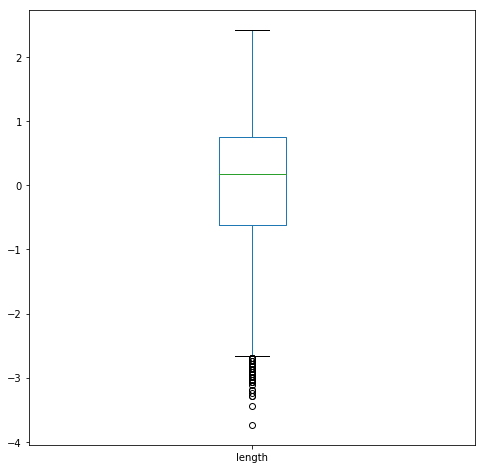

In [31]:
df.length.plot.box(figsize=(8,8)); # the semicolon is to stop Jupyter from "printing" the figure as well

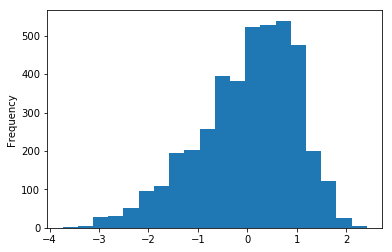

In [29]:
df.length.plot.hist(bins=20);

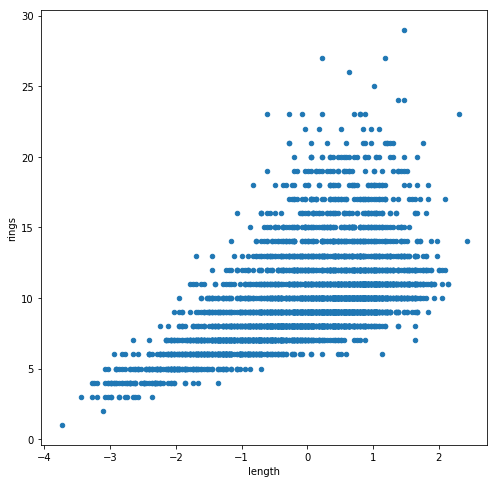

In [30]:
df.plot.scatter("length", "rings", figsize=(8,8));